# Problem 19.1

In [1]:
import numpy as np

In [2]:
def M(vec):
    return (vec[0][0]**2) + (vec[1][0]**2)

# Lagrangian
def L(vec):
    x = vec[0][0]
    y = vec[1][0]
    lamb = vec[2][0]
    return (x**2) + (y**2) + lamb*( ((6*x+29)**2)*((x - 1)**2) + 12*(6*x+31)*(x-1)*(y**2) + 36*(y**4) )
    
# Gradient
def gradL(vec):
    x = vec[0][0]
    y = vec[1][0]
    lamb = vec[2][0]
    grad = np.zeros([3,1])
    grad[0][0] = 2*x + 2*lamb*(72*(x**3) + 414*(x**2) + x*(72*(y**2) + 181 ) + 150*(y**2) - 667 )
    grad[1][0] = 2*y + 24*y*lamb*((x-1)*(6*x + 31) + 6*(y**2))
    grad[2][0] = ((6*x+29)**2)*((x - 1)**2) + 12*(6*x+31)*(x-1)*(y**2) + 36*(y**4)
    return grad

# Hessian
def hessL(vec):
    x = vec[0][0]
    y = vec[1][0]
    lamb = vec[2][0]
    hess = np.zeros([3,3])
    hess[0][0] = 2 + 2*lamb*(216*(x**2) + 828*x + 72*(y**2) + 181)
    hess[0][1] = 24*y*lamb*(12*x + 25)
    hess[1][0] = 24*y*lamb*(12*x + 25)
    hess[0][2] = 2*(72*(x**3) + 414*(x**2) + x*(72*(y**2) + 181 ) + 150*(y**2) - 667 )
    hess[2][0] = 2*(72*(x**3) + 414*(x**2) + x*(72*(y**2) + 181 ) + 150*(y**2) - 667 )
    hess[1][1] = 2 + 24*lamb*(6*(x**2) + 25*x + 18*(y**2) - 31)
    hess[1][2] = 24*y*((x-1)*(6*x + 31) + 6*(y**2))
    hess[2][1] = 24*y*((x-1)*(6*x + 31) + 6*(y**2))
    hess[2][2] = 0.
    return hess

    
    

In [4]:
# Newton-Raphson method with backtracking
# initialize at point (0,0,0)
var = [[-10.], [2], [100.]]
n = 1
l = L(var)
grad = gradL(var)

while (np.linalg.norm(grad) > 1.e-6):
    print(var, M(var), np.linalg.norm(grad), n)
    oldvar = np.copy(var)
    grad = gradL(var)
    hess = hessL(var)
    if (np.linalg.det(hess) == 0):
        break
    deltavar = -np.linalg.solve(hess, grad)
    
    var = var + deltavar
        
    n = n+1
    if (n == 10000):
        print("The loop has ended early after 10000 iterations.")
        break
        
print(var, M(var), np.linalg.norm(grad), n)

[[-10.0], [2], [100.0]] 104.0 7261755.682490082 1
[[-8.22342294]
 [ 1.60276179]
 [71.84671196]] 70.19353022848775 7261755.682490082 2
[[-6.95928943]
 [ 1.33787318]
 [50.11297747]] 50.221613975665065 2262072.072085171 3
[[-6.08792304]
 [ 1.18913812]
 [33.33109926]] 38.476856347999025 696323.2187423459 4
[[-5.51235602]
 [ 1.15982384]
 [20.45455226]] 31.731260283467215 210203.651626726 5
[[-5.15443234]
 [ 1.27655282]
 [10.35784969]] 28.19775981406988 61675.71757689792 6
[[-4.98565597]
 [ 1.4507854 ]
 [ 2.52006709]] 26.96154370042841 17275.615894635695 7
[[-4.96103394]
 [ 1.4806094 ]
 [ 0.07344669]] 26.80406197869827 3287.0496428903957 8
[[-4.96687424]
 [ 1.44349907]
 [-0.00637331]] 26.753529261418247 102.75949549437897 9
[[-4.67762893e+00]
 [ 3.33847748e+00]
 [-4.78558281e-04]] 33.02564433705951 2.7923668644537543 10
[[-3.16198974e+00]
 [ 4.20991131e+00]
 [-2.08484289e-03]] 27.72153229619825 2271.974357799669 11
[[-5.76537232e+00]
 [ 3.09801712e+00]
 [-2.47279882e-03]] 42.83722804071115 2

# Problem 19.3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [37]:
# Approximation of first derivative/gradient
def centraldiff(f, x):
    grad = np.copy(x)
    eps = np.finfo(float).eps
    eps = eps**(1/3)
    N = np.shape(x)[0]
    for i in range(N):
        y = np.copy(x)
        z = np.copy(x)
        y[i] = x[i] + eps
        z[i] = x[i] - eps
        grad[i] = (f(y) - f(z))/(2*eps)
    return grad

# approximation of Hessian matrix
def centralsecdiff(f,x):
    N = np.shape(x)[0]
    hess = np.zeros([N, N])
    eps = np.finfo(float).eps
    eps = eps**(1/3)
    
    for i in range(N):
        for j in range(N):
            if (i == j):
                s = np.copy(x)
                y = np.copy(x)
                z = np.copy(y)
                y[i] = x[i] + eps
                z[i] = x[i] - eps
                hess[i][j] = (f(y) - 2*f(s) + f(z))/((eps**2))
            else:
                v = np.copy(x)
                w = np.copy(x)
                y = np.copy(x)
                z = np.copy(x)
            
                v[i] = x[i] + eps
                v[j] = x[j] + eps
            
                w[i] = x[i] + eps
                w[j] = x[j] - eps
            
                y[i] = x[i] - eps
                y[j] = x[j] + eps
            
                z[i] = x[i] - eps
                z[j] = x[j] - eps
                hess[i][j] = (f(v) - f(w) - f(y) + f(z))/(4*(eps**2))
            
            
    return hess    

# BFGS general algorithm: takes a general function f to optimize for minimum and outputs estimated optimum
def BFGS(f, init, n):
    k = 1
    eps = np.finfo(float).eps
    x = init
    N = np.shape(init)[0]
    I = np.identity(N)
    C = np.identity(N)
    fval = f(x)
    gradf = optimize.approx_fprime(x, f, np.sqrt(eps)*np.ones(N))
    while (np.linalg.norm(gradf) >= 1.e-12):
        oldx = np.copy(x)
        deltax = -np.dot(C, gradf)
        oldgrad = np.copy(gradf)
        if (np.dot(deltax,gradf) > 0):
            deltax = -deltax
        dt = 1.
        while (f(oldx + dt*deltax) >= fval): #This part is backtracking for the minimum
            dt = 0.9*dt
            if (np.linalg.norm(dt*deltax) <= eps):
                C = np.identity(N)
                deltax = -gradf
                dt = 1.
                if (np.dot(deltax, gradf) > 0):
                    deltax = -deltax
            
            
        d = dt*deltax
        x = oldx + d
        gradf = optimize.approx_fprime(x, f, np.sqrt(eps)*np.ones(N))
        if (np.isnan(gradf).any()):
            break
        g = gradf - oldgrad
        mu = np.dot(np.transpose(g), d)
        if (np.dot(g,d) == 0):
            break
        rho = np.outer(d, d)/mu
        left = I - np.outer(d,g)/mu
        right = I - np.outer(g,d)/mu
        C = left@C@right + rho
        fval = f(x)
        print(x, f(x), gradf, k)
        k = k+1
        if (k == n):
            print("Number of iterations reached.")
            break
    print(x, f(x), np.linalg.norm(gradf), k)
    return x, f(x)
    

In [38]:
def f(z):
    K = 0.
    x = z[0:21]
    y = z[21:42]
    N = np.shape(x)[0]
    for i in range(N-1):
        K = K + x[i]*y[i+1] - x[i+1]*y[i]
    K = 0.5*K
    return K

def eqconst1(x, const):
    return x - const

def eqconst2(x1, x2, y1 , y2, const):
    return (x2 - x1)**2 + (y2 - y1)**2 - const

def g(z):
    zhat = z[0:42]
    lamb = z[42:]
    xhat = z[0:21]
    yhat = z[21:42]
    g = f(zhat)
    g = g + lamb[0]*eqconst1(xhat[0], 0.)
    g = g + lamb[1]*eqconst1(xhat[1], 1./20.)
    g = g + lamb[2]*eqconst1(xhat[20], 0.)
    g = g + lamb[3]*eqconst1(yhat[0], 0.)
    g = g + lamb[4]*eqconst1(yhat[1], 0.)
    g = g + lamb[5]*eqconst1(yhat[20], 0.)
    
    for i in range(20):
        g = g + lamb[i+6]*eqconst2(xhat[i],xhat[i+1], yhat[i], yhat[i+1], 1/400.)
        
    return g


In [40]:
x = np.zeros(68)
n = 1
t = 1.

while (t < 1.e8):
    while (1 > 0):
        def g(z):
            xhat = z[0:21]
            yhat = z[21:42]
            g = -f(z)
            g = g + t*(eqconst1(xhat[0], 0.))**2
            g = g + t*(eqconst1(xhat[1], 1./20.))**2
            g = g + t*(eqconst1(xhat[20], 0.))**2
            g = g + t*(eqconst1(yhat[0], 0.))**2
            g = g + t*(eqconst1(yhat[1], 0.))**2
            g = g + t*(eqconst1(yhat[20], 0.))**2
    
            for i in range(20):
                g = g + t*(eqconst2(xhat[i],xhat[i+1], yhat[i], yhat[i+1], 1/400.)**2)
        
            return g
    
        x = BFGS(g, x, 90)[0]
        break
    
    t = t*10


[-1.33324647e-08  8.99999868e-02  1.57160684e-10  1.57160684e-10
  1.57160684e-10  1.57160684e-10  1.57160684e-10  1.57160684e-10
  1.57160684e-10  1.57160684e-10  1.57160684e-10  1.57160684e-10
  1.57160684e-10  1.57160684e-10  1.57160684e-10  1.57160684e-10
  1.57160684e-10  1.57160684e-10  1.57160684e-10  1.57160684e-10
 -1.33324647e-08 -1.33324647e-08 -1.32538844e-08  1.57160684e-10
  1.57160684e-10  1.57160684e-10  1.57160684e-10  1.57160684e-10
  1.57160684e-10  1.57160684e-10  1.57160684e-10  1.57160684e-10
  1.57160684e-10  1.57160684e-10  1.57160684e-10  1.57160684e-10
  1.57160684e-10  1.57160684e-10  1.57160684e-10  1.57160684e-10
  1.57160684e-10 -1.33324647e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 1.34663557e-03  6.53657868e-02 -5.79691314e-02 -3.25353386e-01
 -8.22562724e-01 -1.00916504e+00 -5.46439022e-01 -2.16135696e-01
  2.05724921e-01  5.43801206e-01  1.39447738e-01 -6.58677924e-02
 -3.44717518e-02  6.09055822e-03  3.34749755e-04 -7.94248542e-05
 -4.57249988e-05  5.28885540e-05  6.26079740e-05 -4.02703902e-05
 -7.59879596e-06  4.78123549e-02  1.77623682e-01  5.50128483e-01
  7.95055431e-01  4.75904802e-01 -2.43806096e-01 -5.32035336e-01
 -7.08683302e-01 -3.55108147e-01 -2.63126119e-01  1.83287032e-01
  1.30142012e-01 -2.82649665e-02 -4.32385460e-03  7.40358625e-04
  4.14853126e-05 -4.13358029e-05 -6.09188558e-05  5.59825422e-05
  4.34660659e-05 -7.30538519e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-0.02462063 -0.57811401 -0.92436892 -1.60605283 -1.7446758  -1.83358676
 -1.63796752 -0.965189   -0.19232475  0.48563028  1.08988243  1.69489099
  1.72881855  1.32373913  0.88223006  0.50944075  0.15589072 -0.01745352
 -0.43094282 -0.07305111 -0.05168654  0.3069207   0.33706208  0.29149711
 -0.15595927 -0.62808627 -1.03533608 -1.85497473 -2.23781018 -2.48684736
 -2.38242871 -2.07198138 -1.16027306 -0.2666425   0.35530915  0.51150264
  0.76017121  0.69816974  0.45262402 -0.05139603  0.03259616  0.00712197
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] -2.955788782641429 [ 4.56965923e-01 -1.75778800e+00  1.88726169e+00 -1.21355826e+00
  3.67727578e-01 -1.12318993e-03 -4.50873613e-01 -1.08880699e-01
  8.33694756e-01 -4.76322770e-02 -2.39300478e+00  1.88

[-0.28087853 -0.64097523 -1.07339934 -1.38754851 -0.99419518 -0.82504224
 -0.20498815  0.59330177  1.41565471  2.12755943  2.82881622  3.66716571
  4.12089702  4.34441367  4.23980458  3.85872084  3.27606481  2.65731907
  2.0519469   1.53041851  0.83399012  0.00873663 -0.69082655 -0.87912803
 -1.69361956 -2.73756888 -3.44693893 -4.05968274 -4.27748747 -4.29879343
 -3.97494646 -3.71397341 -3.22254761 -2.58618699 -1.86420543 -0.88326379
 -0.13169611  0.78752856  1.06174789  1.11937597  0.894118    1.04165826
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] -9.85653709511867 [ 0.67173862 -1.44565725  1.07544661 -1.97954202  2.47278571 -0.85937047
  0.11545324  0.08016586  0.33178413 -0.12111497 -1.97109485  1.49036705
 -0.08357394  0.0631808  -0.19383943  0

  0.          0.        ] -14.453320153467512 [ 0.02957129  0.10052228 -0.00108433 -0.09073138  0.01657343 -0.04464531
  0.05727482 -0.02939224  0.01091623  0.00458336  0.00226712 -0.04062176
  0.01027584  0.00665498  0.00446749 -0.00538135  0.00892234 -0.0146153
  0.0297271  -0.0203774  -0.00676036 -0.08397436 -0.00092244  0.01836634
 -0.01968408 -0.01470971  0.03076243 -0.02814627 -0.00022745  0.01560831
 -0.00991535 -0.00793791 -0.00096297  0.01725388 -0.01341915  0.02884603
 -0.0075779  -0.01743221 -0.00134647  0.01407349 -0.00928628  0.00935042
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 80
[-0.39212744 -0.58203204 -0.84844599 -0.85515089 -0.58037227 -0.05716263
  0.65631085  1.51321809  2.44094191  3.3591052   4.19838592  4.8893509
  5.366649

[-0.17145938 -0.0633988   0.72865154  1.24772315  2.4588234   2.83937836
  3.4167985   2.86457227  2.3666537   1.75690853  1.31708843  0.88440602
  0.57913803  0.45281554  0.46129695  0.61441463 -0.04307674 -0.84366862
 -0.98091225 -1.10929839 -0.95095782  0.76483526  1.00265252  1.20083539
  0.76965906  0.24840402  0.07102174 -0.5965477  -0.37467499 -0.30487348
 -0.41354677 -0.62239998 -1.0115368  -1.50793581 -1.99819678 -2.59741176
 -3.07124142 -2.87374262 -2.06008393 -1.40698188 -0.94266422 -0.12123811
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 111.10654967761245 [ -4.21464539 -23.24251175  11.75473213 -74.21873283  81.80128288
 -14.86823463  25.92727661  -2.92907906   4.32930374  -5.0095787
   1.99010277  -1.2586956   -2.34041786  -0.85874557 

[ 0.03015525 -0.35331817 -0.9547685  -0.75426813 -0.40537349 -0.27849264
  0.12291652 -0.29347062  0.4311807  -0.08888729 -1.00025193 -0.6381928
 -0.64972761 -0.11859279 -0.08515661  0.42438203  0.35355441  0.97676721
  0.87437927  0.35202986 -0.21479763 -0.50108111 -0.40464551 -0.75617819
 -0.68965575 -0.32542864 -0.42166327 -0.44843442 -0.67945647  0.00512191
  0.81463041  1.12619493  0.82879805  0.59945303  0.37945858  0.29906661
 -0.65541578 -1.14013408 -0.73703405 -0.21709963  0.15266248  0.01475837
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 58.39044568516837 [  3.16534948   1.31689978 -11.81097794  -3.39283323   3.26529169
  -2.38099575   6.42239761 -32.69468117  47.19250345  13.9590888
 -36.8764658    3.42968035  -6.76703262   7.11192417 -2

[ 0.62187544  0.43398086  0.27998394  0.00961396  0.36101882  0.69025807
  0.62177324  0.1253578  -0.15235648 -0.69130499 -0.81059125 -0.410962
  0.16739629  0.21282238  0.15040051  0.04844411 -0.08949698 -0.09880175
 -0.20191265 -0.42155895 -0.25086001  0.4075831   0.39127112  0.26091903
  0.25720915  0.77009584  1.11982581  1.26457844  0.70514704  0.32940634
  0.18955887 -0.12021435 -0.62871917 -0.77615046 -0.59932856 -0.43302494
 -0.83850223 -0.50504049 -0.50885216 -0.15169762  0.23606185  0.63270545
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 23.587010835448012 [12.49042368  7.73974776  0.59535503 -6.41637564  1.96138501  2.82157922
 11.20192742 -8.19310141  4.49005318 -5.89091682 -6.75101686 -1.20911288
  8.11269259 -0.04300165  0.74975586  0.

[ 0.00141667  0.02667061 -0.14862434 -0.40819818 -0.64355742 -0.83082614
 -0.98068583 -1.09835137 -1.09417841 -0.96086842 -0.76806375 -0.51970828
 -0.26782618  0.00393763  0.21765015  0.4291498   0.57405078  0.55948227
  0.43603473  0.21757884  0.02463273  0.00235832  0.01404309  0.11518348
  0.16376799  0.11352657  0.01821742 -0.19990456 -0.42009572 -0.69748908
 -0.94504329 -1.1500175  -1.26017266 -1.31216662 -1.25163603 -1.09028387
 -0.91869517 -0.68573378 -0.42798305 -0.1950796  -0.01993312 -0.01710523
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] -0.9983063442762403 [ 0.02305517 -0.2550858   0.35361981 -0.17558408 -0.13693658  0.24953215
  0.09591891 -0.04523119 -0.13331665  0.04305157  0.04054268  0.14825815
 -0.1785005   0.11294152 -0.1812171  

[-2.89862064e-05  1.14521441e-02 -2.60145281e-01 -5.39193982e-01
 -7.97389270e-01 -1.00726458e+00 -1.14546588e+00 -1.19984697e+00
 -1.16198108e+00 -1.03861342e+00 -8.39721043e-01 -5.88554194e-01
 -3.11225175e-01 -3.75841015e-02  2.01682820e-01  3.83714144e-01
  4.86578030e-01  4.98306494e-01  4.21169438e-01  2.62442605e-01
  3.81017422e-02 -1.77456172e-04  1.73192937e-02  8.72449862e-02
  6.87411999e-02 -4.00530050e-02 -2.24535891e-01 -4.68029743e-01
 -7.42639668e-01 -1.01946446e+00 -1.27129012e+00 -1.46853613e+00
 -1.58996641e+00 -1.62454514e+00 -1.56777040e+00 -1.42522739e+00
 -1.21443910e+00 -9.55458032e-01 -6.77355812e-01 -4.09506143e-01
 -1.82311829e-01 -1.78799425e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 1.08019185e-03  9.32987302e-02  1.77080021e-02 -6.81939299e-02
 -3.21824506e-01 -2.99195076e-01 -2.78839996e-01 -2.83791996e-01
 -3.08526082e-01 -3.28331289e-01 -2.57797018e-01 -4.26736939e-01
 -2.66733694e-01 -5.27439149e-01 -4.28325628e-01 -4.03467065e-01
 -4.46300579e-01 -4.98848826e-01 -3.52572938e-01 -2.13558672e-01
 -3.82349102e-02  7.53222132e-04  2.43848963e-02 -2.15353647e-01
 -5.26764388e-01 -8.07640208e-01 -7.91293486e-01 -7.78251544e-01
 -7.86939058e-01 -7.00723741e-01 -7.12459321e-01 -7.07270138e-01
 -6.33313575e-01 -6.82152859e-01 -7.06052225e-01 -6.66537127e-01
 -6.40845859e-01 -8.09712797e-01 -6.83936372e-01 -4.18836188e-01
 -1.54956831e-01  1.85712194e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00] 4.586217994870938 [ -1.4488883    8.13242537  -0.45194602   1.50546187  -1.78234094
  -7.50854629   7.3599723    1.65889853   3.99237096   0.19625086
  -2.53874665 -11.17383873   8.63880861  -2.0180164   -0.9154067
  -0.6536299    7.72092271  -4.4816587   -0.31105167   0.09192902
   0.12585324  -1.29365158  -1.08272147  -1.64377314  -1.34299022
   1.06821096   2.72801006  -1.34809983  -0.11197847   5.78868961
  -3.834984    -4.52222943  -8.62798202   5.98610735  -0.69781905
   4.13590169   2.2312398   -2.77739614   1.80706638  -0.59701937
   0.0566805   10.76234412   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.        ] 16
[ 0.00403332  0.07944761  0.03571609 -0.06909515 -0.207

[-0.00914991  0.05327914 -0.01667307 -0.19424053 -0.22749556 -0.03359676
  0.10809432 -0.18361799 -0.18379155 -0.20886935 -0.09780681  0.01314935
 -0.09870589  0.0762095   0.14134307  0.1789105  -0.02589063 -0.10658128
 -0.12935613 -0.03876755 -0.05032196 -0.00732447  0.00357794 -0.06712864
  0.0111117  -0.09669661 -0.10670143 -0.16990176  0.02132044  0.18028309
  0.21674185  0.1609311   0.0707003  -0.09813044 -0.17443517 -0.30999993
 -0.40720677 -0.34381543 -0.1559893  -0.10151375 -0.04713169  0.03816897
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 2.9725552799614148 [ -1.86963189   0.93044901   2.28610122  -2.34587854  -2.80700335
   1.54390615  15.06294766 -14.07792109  -0.10472685  -0.56018019
  -0.14847961   2.64958379  -3.97379074   1.95483407

[ 0.03537084  0.03905647  0.11456779 -0.05557553 -0.23598218 -0.29963755
 -0.27562037 -0.26610474 -0.23416698 -0.19014529  0.0085246   0.12661718
  0.19375115  0.17405395  0.27368539  0.24274748  0.31706237  0.23336671
  0.04288766  0.06968475  0.01839205  0.02493475 -0.05325354 -0.29086154
 -0.24163493 -0.15718923 -0.08629044 -0.07889147 -0.03298444 -0.03616494
 -0.02580694 -0.1290246  -0.11860252 -0.144661   -0.16387268 -0.20937021
 -0.21415442 -0.14136845  0.00241613 -0.0163194  -0.03509835 -0.06054714
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 1.924382334983174 [ 7.09544866e+00 -3.82744563e+00  3.86113057e+00  6.51049629e-01
 -2.59300254e+00 -1.88705459e-01 -4.34532911e-02 -3.73506546e-03
 -1.43579245e-02 -3.74612899e+00  3.28514984e+00  4.814

[-6.11651264e-04  5.02622099e-02 -5.80900443e-03  1.22865535e-02
 -2.10894156e-02  1.56308282e-02  3.24489393e-02  2.52803581e-02
  3.36445420e-02  2.06130714e-02 -4.64439330e-03 -1.17956881e-02
 -6.81963361e-02 -4.66392993e-02 -4.80179320e-02 -6.15856483e-02
 -2.49372612e-02  3.66863866e-02  3.58337674e-02  1.84648408e-02
  9.37292960e-04 -2.64024546e-03  9.46858370e-05 -2.70201281e-02
 -2.65031110e-02 -3.79621251e-02 -6.03159874e-02 -6.86152747e-02
 -4.52286815e-02 -2.79155775e-02 -8.43178612e-03 -9.30335853e-03
 -8.43775836e-03 -1.70881343e-02 -4.48127559e-02 -6.35336432e-02
 -5.97770269e-02 -8.53112822e-02 -7.30589485e-02 -8.11728493e-02
 -1.54595464e-02  7.08111422e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

  0.          0.        ] 61
[-0.00057763  0.0509052  -0.02924099 -0.06119743 -0.10751349 -0.05369247
  0.00726438  0.04016513  0.0209993  -0.06066639 -0.14617948 -0.23199493
 -0.28965541 -0.31153443 -0.30066212 -0.2292359  -0.16287689 -0.08047005
  0.00206299  0.03453177  0.0003676  -0.00187864  0.0006098   0.02899835
  0.02070919 -0.00508589 -0.03575497 -0.00471864  0.06445825  0.15476666
  0.19695843  0.18257756  0.13787684  0.07500141 -0.01503472 -0.0992932
 -0.15969675 -0.21163869 -0.20888006 -0.13678571 -0.0607858  -0.00095639
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] -0.06614610926126614 [-0.11905553  0.32044355 -0.17968889  0.04082017 -0.00631132 -0.02452355
 -0.04129939  0.01075382  0.08192192 -0.03656483  0.09341624 -0.07157152
  0.0195

[ 1.77928253e-05  5.09991772e-02  9.33905400e-02  1.05192045e-01
  7.65492914e-02  3.57170032e-02 -3.51608756e-02 -1.23282579e-01
 -2.22432000e-01 -3.15870372e-01 -4.05401068e-01 -4.60699777e-01
 -5.03948938e-01 -5.16161945e-01 -4.86589279e-01 -4.34658079e-01
 -3.49795455e-01 -2.61474076e-01 -1.59887763e-01 -7.01737219e-02
 -1.02196605e-03 -4.45642359e-04  1.31084596e-03  9.25946873e-02
  1.92294434e-01  2.85443066e-01  3.78077101e-01  4.47512846e-01
  4.88684391e-01  5.00447149e-01  4.79069916e-01  4.41275371e-01
  3.52577752e-01  2.67020125e-01  1.62091899e-01  6.45342492e-02
 -1.67320961e-02 -6.50330601e-02 -1.08728619e-01 -1.08763785e-01
 -7.21152803e-02 -9.35574828e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-9.07571304e-05  5.11773984e-02  1.09924423e-01  1.39813701e-01
  1.42207210e-01  1.05143976e-01  4.53739953e-02 -4.15885230e-02
 -1.39780057e-01 -2.41783944e-01 -3.36976343e-01 -4.16234363e-01
 -4.66646630e-01 -4.86313598e-01 -4.84216134e-01 -4.42018709e-01
 -3.72200557e-01 -2.83764310e-01 -1.86007398e-01 -8.80204113e-02
 -1.01121481e-03 -1.06336987e-04  9.29644708e-04  8.41483141e-02
  1.79786629e-01  2.80754438e-01  3.75912712e-01  4.57484161e-01
  5.11838186e-01  5.35779115e-01  5.34363917e-01  4.97401727e-01
  4.33170870e-01  3.45030791e-01  2.48194647e-01  1.46978785e-01
  5.62046536e-02 -1.66035027e-02 -6.23880419e-02 -7.60932425e-02
 -5.21395982e-02 -7.88869589e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-0.00509803  0.05100497  0.01568042 -0.07984545 -0.1171281  -0.11398525
 -0.13307406 -0.15110796 -0.1485327  -0.15690197 -0.19382203 -0.18753265
 -0.22744292 -0.22807329 -0.19638159 -0.21872063 -0.23511472 -0.18428188
 -0.09716351 -0.0480688   0.00977011 -0.00053093 -0.00539956  0.06713296
  0.12564655  0.24520703  0.25886169  0.22989907  0.28066931  0.31030978
  0.27704292  0.28071252  0.25481703  0.26279473  0.23320095  0.25093918
  0.23628743  0.19862175  0.20309237  0.155034    0.08037628 -0.00038168
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 0.592978310731726 [-10.34398506   2.69319355   3.20781331  -1.96256343  -2.00388936
  -0.12032276   0.11717146  -0.05263017  -0.05912033  -0.10681248
   0.22205195  -0.17073117   0.14137512   0.1597326  

[ 1.67806668e-03  4.18242781e-02  3.98573326e-02 -1.61181716e-02
 -4.97115505e-02 -6.10350252e-02 -1.18212428e-01 -1.46509642e-01
 -9.02097163e-02 -1.45004623e-01 -1.08206288e-01 -5.14867079e-02
 -9.25208784e-02 -3.99786424e-02 -7.54953529e-02 -2.22934936e-02
  3.19238901e-02 -1.92450137e-02 -6.39804466e-02 -7.15421151e-02
  8.48863023e-03 -3.58846295e-03 -3.99182966e-03 -2.89415091e-02
 -9.16783581e-02 -1.13357335e-01 -4.98019950e-02 -7.94701165e-03
  1.49907115e-02  1.22052543e-01  1.51667580e-01  1.95375339e-01
  2.34455750e-01  2.62352147e-01  2.19639770e-01  1.81013044e-01
  1.24035163e-01  8.50900576e-02  6.43715709e-02  8.81132082e-02
  1.36234669e-02 -1.59788606e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-0.00179246  0.05399768  0.06784556  0.09504962  0.01549655  0.04495268
  0.01848982  0.11284466  0.09433162  0.04562863 -0.04388437 -0.08884302
 -0.098348   -0.06232463 -0.06944429 -0.08736952 -0.07702669 -0.11580594
 -0.05220826 -0.01535696  0.00282606  0.00216659 -0.00069223  0.0183506
  0.07853626  0.07333699  0.14203212  0.0838549   0.09589331  0.09375546
  0.03056028  0.02839105 -0.03526466 -0.06021575 -0.04871349  0.02311439
  0.05990682  0.08594422  0.03539103  0.0053226   0.05977381  0.00020653
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 0.19767318870934217 [-3.72307087  8.23357246 -0.35004107  1.40210312 -1.62237329  0.52618935
 -2.61594275  2.30689048  0.94514612  1.25508996 -1.29995273 -0.66625007
  0.22885185 -0.11867182 -0.1906388   

[ 0.00068486  0.05098957  0.10143868  0.07079062  0.08552493  0.04932139
  0.02786868  0.0570506   0.02249615  0.00788416 -0.00498112 -0.017212
 -0.02370696 -0.01681119  0.00033441 -0.0432297  -0.04240827 -0.05696358
 -0.06464814 -0.03043227 -0.00345143  0.00043397  0.0012052   0.07782564
  0.08295656  0.11271761  0.07840934  0.10608382  0.11837865  0.10707286
  0.02000457  0.04551734  0.00035917 -0.02205757 -0.0492883   0.01223027
  0.00895998  0.01758782  0.04064031  0.01033292 -0.01104349 -0.00029918
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 0.10658527923692782 [ 1.36286916e+00  7.52942321e-01  9.64811070e-01  2.53001806e-01
 -8.18458330e-02 -1.04224299e-01  2.64101003e-01 -3.38109302e-01
  5.21477952e-01 -3.65307906e-01  8.12394340e-02 -1.788

[-1.00360082e-04  5.05063239e-02  4.38408889e-02  6.68767801e-02
  7.81209364e-02  7.50656078e-02  4.47603280e-02  8.12231668e-02
  1.10560451e-01  7.92144335e-02  2.43729913e-02 -3.30660118e-02
 -3.87649973e-02 -2.19065662e-02 -2.33531321e-02 -7.16567723e-02
 -3.52523201e-02 -6.48228092e-02 -6.95946315e-02 -5.41742806e-02
 -5.49735497e-04  4.25203116e-04  3.05007360e-04  3.71205267e-02
  7.08590805e-02  1.21573656e-01  1.67663673e-01  1.93030128e-01
  2.05124355e-01  1.87011283e-01  2.37343048e-01  2.44595318e-01
  2.24826768e-01  1.82227408e-01  1.40215184e-01  8.98138781e-02
  9.75274753e-02  6.65827756e-02  9.12405060e-02  6.23450312e-02
  9.64495994e-03  2.85474317e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

  0.          0.        ] 60
[ 1.05868906e-04  5.01709670e-02  9.96081573e-02  1.56889054e-01
  1.80536983e-01  1.88207450e-01  1.58051127e-01  1.37861775e-01
  1.86137522e-01  1.39625874e-01  9.52379997e-02  4.07911181e-02
 -1.27522206e-02 -4.57611838e-02 -6.29058368e-02 -9.15810824e-02
 -9.93448762e-02 -1.40918547e-01 -1.11816087e-01 -5.29313091e-02
 -1.91624422e-04 -3.87485632e-05  3.64242615e-05  2.71028622e-02
  3.87607484e-02  9.23664375e-02  1.45480916e-01  1.89948224e-01
  2.44493951e-01  2.48109810e-01  2.81238329e-01  3.10702396e-01
  3.21550992e-01  3.17029738e-01  2.70423221e-01  2.18853222e-01
  1.71992353e-01  1.19891199e-01  9.99773693e-02  4.44778274e-02
  2.65255225e-02 -1.99098265e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00] -0.0886110149483867 [-0.03065962 -0.13079131  0.02132376  0.02762905 -0.06401581  0.0362228
  0.01931858 -0.09038701  0.04494384  0.0062702   0.02841475 -0.03393385
  0.00785516  0.03431269 -0.05177893  0.0166142   0.02516399 -0.0275014
  0.01087419  0.01136798 -0.00872675 -0.04311214 -0.01345752  0.03376695
 -0.02664675  0.00654176  0.03872387 -0.01266559 -0.03681664  0.04901783
 -0.02566459 -0.02560697  0.01356156 -0.03444387  0.0181549   0.01805402
  0.01011592 -0.04845788  0.01809453  0.01634344  0.01947929 -0.04048132
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 71
[ 4.66976303e-05  5.00603237e-02  1.06844534e-01  1.59812407e-01
  1.95541929e-01  2.28192308e-01  2.36984691e-01  2

[-3.41850304e-06  5.00811622e-02  1.06483063e-01  1.58732625e-01
  2.00983916e-01  2.27935868e-01  2.38137578e-01  2.29709216e-01
  2.03919144e-01  1.64039694e-01  1.13119924e-01  5.62740534e-02
 -2.89964663e-04 -5.16009435e-02 -9.18968367e-02 -1.18566610e-01
 -1.27564540e-01 -1.17783072e-01 -9.10585224e-02 -5.08788896e-02
 -8.64087561e-05 -1.17962637e-05 -1.51078516e-05  8.11165716e-03
  3.08375528e-02  6.94512854e-02  1.19607730e-01  1.75931576e-01
  2.32487014e-01  2.83407052e-01  3.24548539e-01  3.50578219e-01
  3.58611503e-01  3.49254460e-01  3.23879514e-01  2.82973293e-01
  2.32151360e-01  1.75413166e-01  1.18823894e-01  6.80584273e-02
  2.72554950e-02  3.36952188e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 8.18738691e-05  5.01451972e-02  8.21707611e-02  1.33697859e-01
  1.59440995e-01  1.84029292e-01  1.85776001e-01  1.83387756e-01
  1.54584440e-01  1.29097905e-01  8.81735060e-02  4.69507774e-02
  2.11737607e-03 -3.75089990e-02 -6.34563754e-02 -8.42658741e-02
 -8.87368039e-02 -8.13465400e-02 -5.83721777e-02 -1.84918812e-02
 -8.21291870e-05 -5.62976800e-05  9.23630521e-05  4.69668081e-02
  6.61243584e-02  1.01642501e-01  1.40627477e-01  1.84474620e-01
  2.27016169e-01  2.62173100e-01  2.94518037e-01  3.12168726e-01
  3.19833580e-01  3.05551273e-01  2.89308086e-01  2.54749915e-01
  2.16968262e-01  1.72738858e-01  1.26490025e-01  9.04558736e-02
  5.24768218e-02  4.64591668e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-3.13621352e-05  4.98247220e-02  5.74858075e-02  8.83787975e-02
  1.28465472e-01  1.75027745e-01  1.65449480e-01  1.86586790e-01
  1.35847248e-01  1.32895446e-01  8.47564820e-02  3.93471423e-02
  1.23162608e-02 -3.68781542e-02 -4.51948619e-02 -8.63039872e-02
 -7.24744677e-02 -5.91363894e-02 -1.69270421e-02  6.76001199e-03
  2.88754424e-04 -4.67402457e-04 -2.59585070e-04  3.70165956e-02
  6.55396058e-02  9.64935967e-02  1.30361498e-01  1.82991876e-01
  2.32766342e-01  2.40610471e-01  2.95200235e-01  2.96786676e-01
  3.24852771e-01  2.79510094e-01  2.97420602e-01  2.45339552e-01
  2.10621004e-01  1.60586754e-01  1.07946661e-01  7.90355089e-02
  4.08388411e-02  5.72420474e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-1.44791511e-04  5.02004980e-02  6.79394901e-02  5.70806692e-02
  1.07540686e-01  1.52281669e-01  1.66433629e-01  1.97399817e-01
  1.62140190e-01  1.40348495e-01  8.80376520e-02  3.70284564e-02
 -3.86610506e-03 -5.48704992e-02 -7.52892636e-02 -7.99155431e-02
 -7.56051462e-02 -3.44776125e-02  2.59304689e-03  4.11022265e-02
 -8.22156686e-05  3.40168125e-04  1.26337766e-04  5.21647128e-02
  1.02197070e-01  1.00710489e-01  1.09929442e-01  1.65419364e-01
  2.09470693e-01  2.52614091e-01  3.02725830e-01  3.26114516e-01
  3.39046553e-01  2.99621767e-01  2.93403080e-01  2.42973677e-01
  1.85237065e-01  1.30481757e-01  9.89117805e-02  6.80386723e-02
  3.33471982e-02 -1.75995436e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 2.65181217e-04  5.00017218e-02  9.17464743e-02  1.44849146e-01
  1.87918502e-01  2.06285871e-01  1.81465842e-01  1.77281348e-01
  1.42333486e-01  1.15481447e-01  8.22972781e-02  3.43859280e-02
  6.71265598e-04 -5.11073925e-02 -7.77703881e-02 -1.12990276e-01
 -1.35528906e-01 -8.86599070e-02 -7.53846714e-02 -3.62534715e-02
  8.86694310e-05  5.55422976e-05  5.06551071e-05  3.26554430e-02
  6.34347242e-02  8.51437240e-02  1.33378143e-01  1.75574236e-01
  2.32665127e-01  2.65313446e-01  3.06061206e-01  3.31904328e-01
  3.26123463e-01  2.92250684e-01  2.79618174e-01  2.35331399e-01
  2.03260476e-01  1.58157800e-01  1.36770899e-01  8.86490156e-02
  4.44985167e-02 -2.57810489e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-1.54380351e-04  5.01597809e-02  8.61550349e-02  1.30965194e-01
  1.86162002e-01  2.12840599e-01  1.75711754e-01  1.85005210e-01
  1.42997022e-01  1.13022470e-01  8.56995570e-02  3.32577264e-02
  1.92937737e-03 -5.05724916e-02 -7.25631439e-02 -8.44553825e-02
 -7.14622612e-02 -4.21730500e-02 -2.35702292e-02  1.76259461e-02
  5.62989106e-05 -1.47038862e-04  4.03847808e-05  4.19546143e-02
  7.37370226e-02  9.22801763e-02  1.36826136e-01  1.73691571e-01
  2.24669881e-01  2.50120969e-01  2.87199465e-01  3.31204701e-01
  3.23374016e-01  2.88414595e-01  2.91006418e-01  2.46738551e-01
  1.99868984e-01  1.46800549e-01  1.01989200e-01  5.70388299e-02
  4.91346509e-02  7.38869354e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 1.63073782e-05  5.00008569e-02  8.59794264e-02  1.21945076e-01
  1.67039617e-01  1.93533433e-01  1.73190804e-01  1.81743646e-01
  1.40505546e-01  1.06931760e-01  6.97249992e-02  2.01199323e-02
 -2.06475455e-02 -7.05248487e-02 -9.42233192e-02 -1.09220419e-01
 -1.16272339e-01 -8.98083146e-02 -5.38137056e-02 -1.19748804e-02
 -1.81907999e-05  3.48804731e-05 -1.85354047e-06  3.15139898e-02
  6.76086621e-02  8.83747479e-02  1.31914972e-01  1.78629812e-01
  2.29576286e-01  2.58476541e-01  2.89834237e-01  3.25854886e-01
  3.40164863e-01  3.12349226e-01  3.00919697e-01  2.54865983e-01
  2.06747095e-01  1.58758505e-01  1.13902591e-01  7.52339587e-02
  4.95588706e-02  1.12001631e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-6.21252900e-07  5.00089691e-02  9.87568408e-02  1.43350578e-01
  1.76303716e-01  1.94072241e-01  1.95672110e-01  1.89503328e-01
  1.64285573e-01  1.30879714e-01  8.49043889e-02  3.43096075e-02
 -1.35680945e-02 -5.67018459e-02 -9.43564195e-02 -1.09076438e-01
 -1.14782339e-01 -1.03274350e-01 -7.72881203e-02 -3.94096400e-02
 -9.10363462e-06 -2.95409714e-06  3.02302654e-06  1.41659184e-02
  3.89948094e-02  7.81116967e-02  1.25996933e-01  1.77186734e-01
  2.27660737e-01  2.71767196e-01  3.10045534e-01  3.31642595e-01
  3.36981728e-01  3.20601976e-01  2.93784934e-01  2.59667385e-01
  2.11024214e-01  1.60563556e-01  1.10703333e-01  6.69988240e-02
  3.30073286e-02  3.92088078e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 2.71337976e-07  5.00073215e-02  9.96362948e-02  1.43873556e-01
  1.78234978e-01  1.97617575e-01  2.03413976e-01  1.93748817e-01
  1.67795317e-01  1.28890541e-01  8.21608514e-02  3.15994312e-02
 -1.83739263e-02 -6.16530788e-02 -9.58073328e-02 -1.16329670e-01
 -1.20810613e-01 -1.10347145e-01 -8.37176077e-02 -4.49064187e-02
 -7.55791717e-06 -2.78464219e-06 -1.29104044e-06  1.06830639e-02
  3.55988584e-02  7.30276861e-02  1.19921146e-01  1.70381722e-01
  2.20272359e-01  2.63937220e-01  2.96561286e-01  3.16287198e-01
  3.20388175e-01  3.10806619e-01  2.84230220e-01  2.46732233e-01
  2.00328315e-01  1.49716087e-01  1.00036537e-01  5.66638634e-02
  2.39339815e-02  2.75262863e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 1.77841152e-07  5.00076041e-02  9.96602257e-02  1.43363802e-01
  1.76956323e-01  1.97007305e-01  2.00812571e-01  1.89032529e-01
  1.62572552e-01  1.23934990e-01  7.70047460e-02  2.63784449e-02
 -2.28907578e-02 -6.62696286e-02 -9.90006709e-02 -1.18482971e-01
 -1.23067085e-01 -1.11817043e-01 -8.51337233e-02 -4.67880427e-02
 -7.86646569e-06 -1.39206739e-06 -7.04637392e-07  1.05010528e-02
  3.63543089e-02  7.44492935e-02  1.21107776e-01  1.71758607e-01
  2.21148936e-01  2.64490284e-01  2.97432295e-01  3.16852176e-01
  3.20837238e-01  3.08498224e-01  2.82080018e-01  2.43254915e-01
  1.96376762e-01  1.45797219e-01  9.62812737e-02  5.30653243e-02
  1.97750328e-02  2.10871434e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-6.61808196e-07  4.99966697e-02  9.72192101e-02  1.39731706e-01
  1.71525399e-01  1.89855808e-01  1.93018526e-01  1.80523760e-01
  1.54008853e-01  1.15924876e-01  7.03037997e-02  2.11854565e-02
 -2.67840116e-02 -6.86192354e-02 -9.99358947e-02 -1.17963758e-01
 -1.21158300e-01 -1.08957085e-01 -8.24189159e-02 -4.40521346e-02
  7.87321187e-06 -9.81952984e-07 -3.73176453e-06  1.59143097e-02
  4.21082356e-02  7.99279595e-02  1.25648672e-01  1.75004029e-01
  2.22756087e-01  2.64289167e-01  2.95724820e-01  3.13986238e-01
  3.16938312e-01  3.04243478e-01  2.77302087e-01  2.39547100e-01
  1.94039418e-01  1.44774330e-01  9.64710695e-02  5.42315391e-02
  2.26039221e-02 -5.27011415e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-1.91667266e-06  4.99936126e-02  9.64158553e-02  1.38833568e-01
  1.70983059e-01  1.89642517e-01  1.93123469e-01  1.80550965e-01
  1.54082285e-01  1.15938273e-01  7.01300276e-02  2.09872165e-02
 -2.67532747e-02 -6.83798071e-02 -1.00020168e-01 -1.17921773e-01
 -1.20969865e-01 -1.08329936e-01 -8.18221421e-02 -4.35754617e-02
  9.08479335e-06 -9.34193667e-07 -5.19673904e-06  1.65892575e-02
  4.18974986e-02  7.95209643e-02  1.25374429e-01  1.74776548e-01
  2.22554863e-01  2.64445948e-01  2.95787163e-01  3.14060553e-01
  3.16790132e-01  3.04320371e-01  2.77510080e-01  2.39502279e-01
  1.93484679e-01  1.44018438e-01  9.62279547e-02  5.44232450e-02
  2.33384946e-02 -5.92420184e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00] 18
[-3.96872641e-06  4.99905148e-02  9.34055864e-02  1.41806557e-01
  1.72190779e-01  1.89380334e-01  1.95933289e-01  1.79538301e-01
  1.56930726e-01  1.17240871e-01  7.07771036e-02  2.07229079e-02
 -2.89922755e-02 -6.96184050e-02 -1.01730751e-01 -1.16478808e-01
 -1.24373586e-01 -1.08098933e-01 -8.37871273e-02 -3.90100107e-02
  1.60601124e-05 -1.94534399e-06 -8.02504071e-06  2.49529456e-02
  4.04984323e-02  7.99466906e-02  1.25940097e-01  1.74423275e-01
  2.21024915e-01  2.65643353e-01  2.96501046e-01  3.15818133e-01
  3.16394634e-01  3.07370731e-01  2.77562231e-01  2.39442201e-01
  1.91734194e-01  1.43332401e-01  9.71491549e-02  5.41163986e-02
  3.11876479e-02 -1.07857176e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.0

[-3.85952966e-06  4.99860830e-02  9.21786175e-02  1.38912764e-01
  1.76652988e-01  1.88416013e-01  2.02505749e-01  1.82097720e-01
  1.57921826e-01  1.18454533e-01  7.02266630e-02  1.99309102e-02
 -2.89643825e-02 -7.16555362e-02 -1.00681210e-01 -1.17545135e-01
 -1.32148447e-01 -1.13831410e-01 -8.07421345e-02 -3.69476909e-02
  1.39023157e-05 -1.98190637e-06 -8.61402507e-06  2.71616373e-02
  4.61044361e-02  8.04608841e-02  1.29112718e-01  1.77348742e-01
  2.23300644e-01  2.67666630e-01  2.99649688e-01  3.16950982e-01
  3.17588367e-01  3.07531765e-01  2.81376912e-01  2.40757196e-01
  1.93898100e-01  1.45788472e-01  9.91185031e-02  6.06287879e-02
  3.52205810e-02 -9.92499261e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 1.55482272e-06  5.00070220e-02  9.81908017e-02  1.43265164e-01
  1.73775725e-01  1.86817882e-01  1.90971896e-01  1.73355501e-01
  1.52079706e-01  1.20301093e-01  7.31415515e-02  2.29362010e-02
 -2.43094576e-02 -6.67147637e-02 -9.80753071e-02 -1.15584893e-01
 -1.29479361e-01 -1.13892318e-01 -8.60760883e-02 -4.43782807e-02
 -1.28408517e-05  5.55009198e-07  3.42198389e-06  1.45318278e-02
  3.55547089e-02  7.50588191e-02  1.23880478e-01  1.74424414e-01
  2.21156423e-01  2.66511299e-01  3.07029188e-01  3.23101287e-01
  3.22334694e-01  3.03317148e-01  2.77047277e-01  2.38311714e-01
  1.90941383e-01  1.42329538e-01  9.45064581e-02  5.23124578e-02
  2.46081096e-02  7.46658607e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 2.59654490e-07  4.99993369e-02  9.69294984e-02  1.41329793e-01
  1.76518897e-01  1.91381210e-01  1.98128166e-01  1.80312055e-01
  1.59138643e-01  1.21012896e-01  7.39675851e-02  2.40351586e-02
 -2.46624751e-02 -6.73221133e-02 -9.82511805e-02 -1.14373883e-01
 -1.24597837e-01 -1.10730020e-01 -8.39981717e-02 -4.30354383e-02
 -2.89968069e-06 -4.89628549e-07 -8.34770810e-07  1.71911515e-02
  4.04039092e-02  7.60591346e-02  1.23864341e-01  1.73604439e-01
  2.20253577e-01  2.65634336e-01  2.98075124e-01  3.14759644e-01
  3.18473303e-01  3.05967666e-01  2.80380902e-01  2.41287154e-01
  1.94034575e-01  1.44927803e-01  9.68990480e-02  5.44848546e-02
  2.60897195e-02  4.38947621e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 7.02745859e-08  5.00008536e-02  9.86232772e-02  1.41191188e-01
  1.73229545e-01  1.93113527e-01  1.96332707e-01  1.84416908e-01
  1.57302206e-01  1.18351575e-01  7.21031884e-02  2.21353157e-02
 -2.64182416e-02 -6.88605903e-02 -1.00833349e-01 -1.19124223e-01
 -1.23063641e-01 -1.11006008e-01 -8.38075059e-02 -4.58108067e-02
 -1.14615900e-06 -1.35767442e-07 -5.33717423e-08  1.19680009e-02
  3.83456017e-02  7.68498321e-02  1.22802994e-01  1.72757885e-01
  2.21382253e-01  2.63465936e-01  2.94941831e-01  3.14109763e-01
  3.17551445e-01  3.05243618e-01  2.78665671e-01  2.40125756e-01
  1.93502900e-01  1.43571763e-01  9.49686210e-02  5.29044029e-02
  2.02784402e-02  3.41558547e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00] -0.07902539118718872 [ 0.00379238  0.00123917 -0.00051499  0.01207631 -0.01469107  0.00088132
  0.00226161 -0.00100065  0.00352938 -0.0011743  -0.0082958   0.01592507
 -0.01161034 -0.00386053  0.00034948  0.00320286  0.00285371  0.00703926
 -0.01252183  0.00783726 -0.01399081  0.0005151   0.00202885 -0.00196982
  0.01361769 -0.01746154  0.003611   -0.00564403  0.0064036  -0.0051165
  0.00293218  0.00124027  0.00149319 -0.00215931 -0.00685061 -0.01185872
 -0.00062725  0.0210246  -0.0098035   0.01341325 -0.0067932   0.00917333
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 69
[ 1.68252194e-08  5.00007825e-02  9.84332365e-02  1.40262060e-01
  1.71236198e-01  1.89041807e-01  1.91615905e-01 

[-5.79012583e-09  5.00007933e-02  9.78212842e-02  1.39018502e-01
  1.68696540e-01  1.84683645e-01  1.85205152e-01  1.70246793e-01
  1.41217354e-01  1.00818815e-01  5.34125289e-02  3.33248914e-03
 -4.44524875e-02 -8.52448640e-02 -1.15171047e-01 -1.31152636e-01
 -1.31586485e-01 -1.16720643e-01 -8.77892756e-02 -4.75055146e-02
 -7.93393792e-07 -1.31317699e-07 -2.21955862e-09  1.48884897e-02
  4.33720158e-02  8.37095108e-02  1.31171464e-01  1.81248529e-01
  2.29052167e-01  2.69852274e-01  2.99440205e-01  3.15600405e-01
  3.16054075e-01  3.01066705e-01  2.72008998e-01  2.31851904e-01
  1.84386292e-01  1.34310271e-01  8.64864159e-02  4.56096897e-02
  1.58555669e-02  1.27451543e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-1.09871511e-06  5.00017509e-02  9.75106420e-02  1.37971567e-01
  1.67324774e-01  1.82728425e-01  1.82396768e-01  1.66895374e-01
  1.37607390e-01  9.71895691e-02  4.96081763e-02 -4.00859365e-04
 -4.78490171e-02 -8.82306004e-02 -1.17541136e-01 -1.33005974e-01
 -1.32885515e-01 -1.17467224e-01 -8.80076825e-02 -4.74540344e-02
  8.40805471e-07  2.23827623e-07  6.83303092e-07  1.58485143e-02
  4.50384507e-02  8.54584544e-02  1.33022469e-01  1.83053537e-01
  2.30470545e-01  2.70932816e-01  3.00280417e-01  3.15685227e-01
  3.15644763e-01  3.00229724e-01  2.70729095e-01  2.30287974e-01
  1.82736774e-01  1.32818580e-01  8.53178733e-02  4.49268611e-02
  1.55557024e-02 -4.05190174e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 2.94782284e-08  4.99998398e-02  9.73656720e-02  1.37896675e-01
  1.67246984e-01  1.82624498e-01  1.82315079e-01  1.66815970e-01
  1.37525382e-01  9.71108705e-02  4.96007418e-02 -3.37913232e-04
 -4.78347813e-02 -8.81555096e-02 -1.17459099e-01 -1.32908278e-01
 -1.32795057e-01 -1.17355604e-01 -8.79011155e-02 -4.74349154e-02
  2.97668105e-07  1.08401295e-07  1.95556316e-07  1.59010875e-02
  4.51026600e-02  8.55245174e-02  1.33047766e-01  1.82973092e-01
  2.30438670e-01  2.70884555e-01  3.00207119e-01  3.15580276e-01
  3.15557845e-01  3.00130853e-01  2.70668018e-01  2.30237484e-01
  1.82760034e-01  1.32811319e-01  8.53210876e-02  4.49801017e-02
  1.56757054e-02  3.93613052e-09  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 4.76127745e-08  4.99996457e-02  9.73359793e-02  1.37864865e-01
  1.67220946e-01  1.82614254e-01  1.82321583e-01  1.66827323e-01
  1.37540747e-01  9.71197528e-02  4.96009263e-02 -3.44167911e-04
 -4.78436833e-02 -8.81668032e-02 -1.17471242e-01 -1.32911981e-01
 -1.32787094e-01 -1.17333334e-01 -8.78699632e-02 -4.74083292e-02
  5.16749003e-07  1.09476874e-07  1.33604725e-07  1.59212251e-02
  4.51038698e-02  8.55040430e-02  1.33017373e-01  1.82957420e-01
  2.30432879e-01  2.70883464e-01  3.00217112e-01  3.15593876e-01
  3.15569668e-01  3.00138337e-01  2.70670574e-01  2.30228398e-01
  1.82736405e-01  1.32794732e-01  8.53055702e-02  4.49763882e-02
  1.56975162e-02 -6.94627937e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00] -0.07815392558420596 [ 0.08696743  0.01722067 -0.27074679  0.31182518  0.24240663 -0.45012202
 -0.72288564 -0.73703818  0.09057269 -0.49719019  1.70940799  0.07042923
 -0.02585731  0.71050134 -0.55120697 -0.04747414  0.09405024  0.47035336
 -0.64815587  2.13396647  0.47516524  0.17426363  0.37036092 -0.11852175
  0.35534321  1.17137163  0.15242168  0.54047264 -0.17707749 -0.98262745
 -0.3888874  -0.6081852  -0.02640318 -0.05241802  0.90868887 -0.66811209
  0.08986059 -0.54722611 -0.49510383  0.83610928 -0.79120637  0.04358026
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] 21
[ 2.46912874e-08  5.00000568e-02  9.68342573e-02  1.38541701e-01
  1.68106958e-01  1.82513923e-01  1.83035571e-01

[-3.97267585e-08  5.00003163e-02  9.72435809e-02  1.38059149e-01
  1.67346708e-01  1.83496899e-01  1.83773667e-01  1.66943829e-01
  1.37827593e-01  9.68800100e-02  4.93878729e-02 -6.41133981e-04
 -4.82499155e-02 -8.87885574e-02 -1.18284648e-01 -1.34571341e-01
 -1.33514457e-01 -1.17887674e-01 -8.84133572e-02 -4.70673607e-02
 -5.23061726e-07 -1.17912907e-07 -1.40835834e-07  1.65336711e-02
  4.55233137e-02  8.61057142e-02  1.33477629e-01  1.83556268e-01
  2.30756540e-01  2.71497483e-01  3.00295064e-01  3.16051188e-01
  3.16006572e-01  3.00517867e-01  2.71112979e-01  2.30674384e-01
  1.83348550e-01  1.33328231e-01  8.58144119e-02  4.53614335e-02
  1.70921215e-02  4.10722162e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 2.01895787e-08  5.00002813e-02  9.72002426e-02  1.37586656e-01
  1.68676740e-01  1.84049665e-01  1.84372250e-01  1.65218638e-01
  1.34569971e-01  9.58713714e-02  4.81871050e-02 -1.81529434e-03
 -4.84299724e-02 -9.01297928e-02 -1.19286220e-01 -1.31745484e-01
 -1.33519538e-01 -1.17753836e-01 -9.02448854e-02 -4.74366165e-02
  4.85765711e-07  4.87478980e-08  2.00666754e-07  1.65843206e-02
  4.59866324e-02  8.52189012e-02  1.32830473e-01  1.82788320e-01
  2.29055704e-01  2.68510859e-01  3.00172667e-01  3.15141214e-01
  3.15490335e-01  2.97289159e-01  2.69696299e-01  2.29085861e-01
  1.80575161e-01  1.30645293e-01  8.32089557e-02  4.14912187e-02
  1.56338883e-02 -1.04265810e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-7.68775765e-09  5.00000567e-02  9.73851076e-02  1.38085790e-01
  1.67821982e-01  1.83096334e-01  1.83212428e-01  1.67595079e-01
  1.38236438e-01  9.85178506e-02  5.08616485e-02  8.54255453e-04
 -4.66281862e-02 -8.73468214e-02 -1.15949910e-01 -1.31296586e-01
 -1.31802762e-01 -1.18107784e-01 -8.89177062e-02 -4.73591009e-02
 -1.98495284e-07 -2.49171022e-08 -1.87321088e-08  1.59707529e-02
  4.50201396e-02  8.52233592e-02  1.32836633e-01  1.82843675e-01
  2.30352292e-01  2.70841585e-01  3.01233431e-01  3.16398029e-01
  3.15941765e-01  3.00248201e-01  2.71212478e-01  2.30190787e-01
  1.82601106e-01  1.32594513e-01  8.45014074e-02  4.38939848e-02
  1.60822936e-02  4.09587815e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-6.83311022e-09  5.00000668e-02  9.74496828e-02  1.37436639e-01
  1.66462175e-01  1.81214251e-01  1.80294391e-01  1.63844402e-01
  1.33820927e-01  9.30854930e-02  4.53509908e-02 -4.65046888e-03
 -5.20151408e-02 -9.21925098e-02 -1.21329884e-01 -1.35985394e-01
 -1.35109179e-01 -1.18899887e-01 -8.87226215e-02 -4.79312956e-02
 -8.62394339e-08 -1.93138939e-08 -7.12473198e-09  1.57903441e-02
  4.58197674e-02  8.65426522e-02  1.34325539e-01  1.84324587e-01
  2.31549988e-01  2.71542701e-01  3.00550830e-01  3.15461620e-01
  3.14647466e-01  2.98602682e-01  2.68827151e-01  2.28184783e-01
  1.80370454e-01  1.30371739e-01  8.30645905e-02  4.31886884e-02
  1.42615117e-02  3.87541492e-09  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-6.55414465e-09  5.00000721e-02  9.72345841e-02  1.37056007e-01
  1.65655151e-01  1.80156311e-01  1.79138204e-01  1.62794311e-01
  1.32544224e-01  9.16625324e-02  4.37965847e-02 -6.20290010e-03
 -5.34470661e-02 -9.33333012e-02 -1.21960928e-01 -1.36678327e-01
 -1.35643812e-01 -1.19369641e-01 -8.91057693e-02 -4.79862372e-02
 -8.36895290e-08 -1.98924658e-08 -4.99581611e-09  1.64238068e-02
  4.66728331e-02  8.76960008e-02  1.35555409e-01  1.85552966e-01
  2.32814922e-01  2.72636070e-01  3.01437017e-01  3.15916184e-01
  3.14982136e-01  2.98587124e-01  2.68423560e-01  2.27420070e-01
  1.79626686e-01  1.29630144e-01  8.23444538e-02  4.25340333e-02
  1.40738931e-02  2.03073110e-09  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00] -0.07893156012723687 [ 3.63774598e-04  1.87716261e-03  9.35294665e-04 -2.19220761e-03
  8.98430124e-04  9.14461911e-04  3.60632315e-04  1.13477744e-03
  1.37863215e-03  3.73641960e-04 -1.82452984e-03  1.04094855e-03
 -3.18101142e-03  1.17517170e-03  3.51689756e-04  5.21031208e-04
 -2.51982361e-04 -1.29370391e-03  1.81581732e-03 -4.86068428e-04
  1.62717700e-03  1.83684751e-05  6.33460470e-04  8.84646550e-04
 -2.09499057e-03  2.90167518e-04  2.37701554e-03 -6.42535277e-04
 -1.34012382e-03 -5.80279157e-05  1.41665991e-03  9.47467983e-04
  6.20188192e-04 -1.60784926e-03 -2.56206840e-06 -6.96952455e-04
  1.07725058e-03  2.39463430e-03  8.69640149e-04 -2.83965189e-03
  4.42638062e-04 -4.88953665e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0

[-8.24490232e-08  5.00000114e-02  9.71946218e-02  1.37026708e-01
  1.65668370e-01  1.80216631e-01  1.79186888e-01  1.62758068e-01
  1.32593574e-01  9.16081369e-02  4.37839029e-02 -6.20227197e-03
 -5.34443585e-02 -9.33247197e-02 -1.21952947e-01 -1.36597018e-01
 -1.35693078e-01 -1.19378581e-01 -8.91431678e-02 -4.79463983e-02
 -8.26124259e-09  1.88574873e-08  2.72719842e-08  1.65177753e-02
  4.67311044e-02  8.77067806e-02  1.35537458e-01  1.85521550e-01
  2.32739534e-01  2.72608229e-01  3.01238397e-01  3.15806151e-01
  3.14863703e-01  2.98506543e-01  2.68357190e-01  2.27370473e-01
  1.79568892e-01  1.29582634e-01  8.23270017e-02  4.25097782e-02
  1.41868002e-02  2.02480065e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-1.23928585e-08  4.99999610e-02  9.71878609e-02  1.37022629e-01
  1.65666910e-01  1.80215769e-01  1.79185893e-01  1.62757282e-01
  1.32592664e-01  9.16080474e-02  4.37834271e-02 -6.20169975e-03
 -5.34442830e-02 -9.33242683e-02 -1.21951942e-01 -1.36596145e-01
 -1.35692525e-01 -1.19376413e-01 -8.91398381e-02 -4.79401691e-02
  4.52841055e-08  1.06729042e-08  1.71329420e-08  1.65179875e-02
  4.67294848e-02  8.77061209e-02  1.35537846e-01  1.85521450e-01
  2.32738863e-01  2.72607665e-01  3.01237327e-01  3.15805257e-01
  3.14862898e-01  2.98505612e-01  2.68356268e-01  2.27370372e-01
  1.79568967e-01  1.29583358e-01  8.23250348e-02  4.25091970e-02
  1.41873466e-02 -4.20481763e-09  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-1.11638597e-08  4.99999533e-02  9.71864388e-02  1.37020915e-01
  1.65665092e-01  1.80214897e-01  1.79186211e-01  1.62758049e-01
  1.32593594e-01  9.16085783e-02  4.37834550e-02 -6.20200845e-03
 -5.34449977e-02 -9.33253850e-02 -1.21953032e-01 -1.36596556e-01
 -1.35691826e-01 -1.19374924e-01 -8.91383577e-02 -4.79388834e-02
  6.05316192e-08  1.65807255e-08  1.16367690e-08  1.65192524e-02
  4.67298597e-02  8.77049639e-02  1.35535581e-01  1.85519665e-01
  2.32738131e-01  2.72607541e-01  3.01237918e-01  3.15806173e-01
  3.14863862e-01  2.98506377e-01  2.68356370e-01  2.27369500e-01
  1.79567448e-01  1.29581050e-01  8.23240116e-02  4.25094617e-02
  1.41884058e-02 -9.38561654e-09  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

  0.          0.        ] 18
[-1.47433322e-08  4.99999488e-02  9.71863218e-02  1.37020878e-01
  1.65665155e-01  1.80214685e-01  1.79185917e-01  1.62757747e-01
  1.32593283e-01  9.16083923e-02  4.37834244e-02 -6.20245528e-03
 -5.34455192e-02 -9.33255772e-02 -1.21953139e-01 -1.36596622e-01
 -1.35692160e-01 -1.19375393e-01 -8.91386564e-02 -4.79390287e-02
  5.44640263e-08  1.40248686e-08  2.14935852e-08  1.65192753e-02
  4.67297086e-02  8.77047381e-02  1.35535285e-01  1.85519409e-01
  2.32737789e-01  2.72607183e-01  3.01237407e-01  3.15806035e-01
  3.14863791e-01  2.98506476e-01  2.68356105e-01  2.27369094e-01
  1.79567063e-01  1.29580691e-01  8.23235164e-02  4.25091255e-02
  1.41882193e-02 -2.68525881e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

  0.          0.        ] 23
[-2.83773749e-08  4.99999435e-02  9.71893204e-02  1.37025940e-01
  1.65666337e-01  1.80217815e-01  1.79185081e-01  1.62750297e-01
  1.32582062e-01  9.15997001e-02  4.37749275e-02 -6.21147057e-03
 -5.34519950e-02 -9.33331336e-02 -1.21957855e-01 -1.36596200e-01
 -1.35692331e-01 -1.19374890e-01 -8.91408018e-02 -4.79393555e-02
  4.43496910e-08  4.09507345e-09  6.35696104e-08  1.65134850e-02
  4.67219687e-02  8.76998685e-02  1.35530116e-01  1.85514713e-01
  2.32731413e-01  2.72598732e-01  3.01233245e-01  3.15802555e-01
  3.14864134e-01  2.98499319e-01  2.68351008e-01  2.27362723e-01
  1.79559697e-01  1.29573933e-01  8.23173249e-02  4.25010485e-02
  1.41833864e-02 -9.80179962e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

[-3.68914338e-08  5.00000104e-02  9.74529960e-02  1.37450011e-01
  1.65703558e-01  1.80756076e-01  1.78826186e-01  1.61609059e-01
  1.30943031e-01  9.03639799e-02  4.26704823e-02 -7.32749234e-03
 -5.42625557e-02 -9.46440845e-02 -1.23031975e-01 -1.37117443e-01
 -1.35449065e-01 -1.18942973e-01 -8.95867558e-02 -4.82695941e-02
  1.38468452e-08 -2.36339242e-08  9.91944822e-08  1.57885287e-02
  4.57993541e-02  8.70562681e-02  1.34738923e-01  1.84707717e-01
  2.31653973e-01  2.71146398e-01  3.00361363e-01  3.15373367e-01
  3.14784054e-01  2.97519124e-01  2.68020897e-01  2.26857803e-01
  1.78877822e-01  1.28899356e-01  8.17031317e-02  4.12176575e-02
  1.30674683e-02 -1.66898711e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 6.09499366e-10  4.99999942e-02  9.69101610e-02  1.36793101e-01
  1.65382210e-01  1.80006454e-01  1.79353592e-01  1.62998071e-01
  1.32873952e-01  9.21360598e-02  4.44439523e-02 -5.52505992e-03
 -5.27161358e-02 -9.21840763e-02 -1.20449621e-01 -1.35631605e-01
 -1.34945905e-01 -1.19504689e-01 -8.94294032e-02 -4.81319582e-02
 -4.19419100e-08 -7.32322414e-09 -4.18540007e-08  1.73146914e-02
  4.74684030e-02  8.84868429e-02  1.36300383e-01  1.86296589e-01
  2.33543418e-01  2.73449924e-01  3.02441445e-01  3.17466920e-01
  3.15343702e-01  2.98827207e-01  2.68127500e-01  2.26881162e-01
  1.79241269e-01  1.29247607e-01  8.16832805e-02  4.17390808e-02
  1.35476739e-02  3.94505914e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-1.12759943e-08  4.99999985e-02  9.74234184e-02  1.37343283e-01
  1.65535788e-01  1.79720439e-01  1.78474169e-01  1.61292696e-01
  1.30701278e-01  8.99452492e-02  4.22142073e-02 -7.78362142e-03
 -5.48802146e-02 -9.50251558e-02 -1.23438045e-01 -1.37418165e-01
 -1.35693714e-01 -1.18889133e-01 -8.93120756e-02 -4.81248053e-02
 -2.46507343e-08 -1.23559055e-08  2.68901807e-09  1.58496224e-02
  4.59592606e-02  8.72554825e-02  1.35202641e-01  1.85187791e-01
  2.32144433e-01  2.71695861e-01  3.00663077e-01  3.15560043e-01
  3.15056198e-01  2.98259106e-01  2.68452650e-01  2.27307619e-01
  1.79301112e-01  1.29328550e-01  8.22342381e-02  4.19183635e-02
  1.35690194e-02 -2.57281577e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-1.13151032e-08  4.99999972e-02  9.74287476e-02  1.37368544e-01
  1.65591200e-01  1.79853844e-01  1.78490221e-01  1.61225003e-01
  1.30625508e-01  8.99447485e-02  4.21581683e-02 -7.84068189e-03
 -5.49344182e-02 -9.51647496e-02 -1.23618881e-01 -1.37481147e-01
 -1.35687979e-01 -1.18929794e-01 -8.92876991e-02 -4.81444213e-02
 -1.79475097e-08 -1.06031394e-08  4.28351718e-09  1.58295554e-02
  4.59115635e-02  8.71854877e-02  1.35108426e-01  1.85090485e-01
  2.32015988e-01  2.71559497e-01  3.00631710e-01  3.15345731e-01
  3.14899746e-01  2.98101125e-01  2.68408471e-01  2.27294007e-01
  1.79253730e-01  1.29285929e-01  8.21781940e-02  4.19124433e-02
  1.34992897e-02 -2.55107533e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-9.25816156e-09  4.99999986e-02  9.74296233e-02  1.37343114e-01
  1.65567521e-01  1.79921472e-01  1.78466310e-01  1.61185587e-01
  1.30620174e-01  8.99340886e-02  4.21487772e-02 -7.84947398e-03
 -5.49237633e-02 -9.51480289e-02 -1.23679208e-01 -1.37501338e-01
 -1.35679940e-01 -1.18945803e-01 -8.93173990e-02 -4.81503986e-02
 -1.87200117e-08 -9.90151326e-09 -2.16966840e-09  1.58269438e-02
  4.59432169e-02  8.72162382e-02  1.35112600e-01  1.85092352e-01
  2.32012003e-01  2.71582683e-01  3.00646884e-01  3.15366101e-01
  3.14886630e-01  2.98031492e-01  2.68331723e-01  2.27270077e-01
  1.79217700e-01  1.29250093e-01  8.21325939e-02  4.18558343e-02
  1.34770123e-02 -1.56781056e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-9.98303004e-09  4.99999983e-02  9.74273072e-02  1.37331942e-01
  1.65539867e-01  1.79977159e-01  1.78407933e-01  1.61100626e-01
  1.30631536e-01  8.99594928e-02  4.21511287e-02 -7.84700934e-03
 -5.49065232e-02 -9.51437394e-02 -1.23726994e-01 -1.37482389e-01
 -1.35721830e-01 -1.18990159e-01 -8.93080681e-02 -4.81574764e-02
 -1.88905173e-08 -1.03291018e-08 -3.50113882e-11  1.58353789e-02
  4.59634208e-02  8.72478233e-02  1.35118803e-01  1.85095072e-01
  2.32005068e-01  2.71650104e-01  3.00733585e-01  3.15377616e-01
  3.14854944e-01  2.97959060e-01  2.68276294e-01  2.27251027e-01
  1.79179468e-01  1.29209813e-01  8.20914488e-02  4.18540960e-02
  1.34515386e-02 -1.92273919e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[ 1.82847912e-09  5.00000132e-02  9.74261717e-02  1.37333141e-01
  1.65535232e-01  1.79984555e-01  1.78404161e-01  1.61094635e-01
  1.30632919e-01  8.99604947e-02  4.21526072e-02 -7.84528348e-03
 -5.49043523e-02 -9.51441555e-02 -1.23727317e-01 -1.37476294e-01
 -1.35729000e-01 -1.18993573e-01 -8.93018795e-02 -4.81602954e-02
 -1.06156108e-09 -5.81062913e-09 -1.57377272e-08  1.58373109e-02
  4.59622642e-02  8.72504764e-02  1.35118077e-01  1.85093927e-01
  2.32002994e-01  2.71653447e-01  3.00736968e-01  3.15382280e-01
  3.14848942e-01  2.97951301e-01  2.68272743e-01  2.27247343e-01
  1.79173994e-01  1.29203623e-01  8.20866175e-02  4.18562586e-02
  1.34405195e-02  1.38466446e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-1.55435451e-09  5.00000030e-02  9.74264037e-02  1.37333242e-01
  1.65535314e-01  1.79984452e-01  1.78404091e-01  1.61094619e-01
  1.30632775e-01  8.99605363e-02  4.21527151e-02 -7.84527694e-03
 -5.49043016e-02 -9.51443481e-02 -1.23727358e-01 -1.37476253e-01
 -1.35728953e-01 -1.18993696e-01 -8.93020263e-02 -4.81606375e-02
 -1.00955731e-08 -9.68702387e-09  8.89903652e-10  1.58373556e-02
  4.59623686e-02  8.72506164e-02  1.35117991e-01  1.85093816e-01
  2.32002955e-01  2.71653528e-01  3.00736791e-01  3.15382259e-01
  3.14848901e-01  2.97951501e-01  2.68272565e-01  2.27247078e-01
  1.79173738e-01  1.29203616e-01  8.20867230e-02  4.18564046e-02
  1.34406093e-02 -1.63641422e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

[-9.96972077e-09  5.00000044e-02  9.74262392e-02  1.37333174e-01
  1.65535367e-01  1.79984493e-01  1.78404068e-01  1.61094594e-01
  1.30632965e-01  8.99604738e-02  4.21526303e-02 -7.84531526e-03
 -5.49045066e-02 -9.51441850e-02 -1.23727270e-01 -1.37476268e-01
 -1.35729059e-01 -1.18993749e-01 -8.93019595e-02 -4.81602830e-02
 -3.41556872e-09 -1.23341496e-08 -1.05510111e-08  1.58372755e-02
  4.59622917e-02  8.72504956e-02  1.35118106e-01  1.85093953e-01
  2.32002911e-01  2.71653401e-01  3.00736816e-01  3.15382285e-01
  3.14848828e-01  2.97951381e-01  2.68272637e-01  2.27247174e-01
  1.79173862e-01  1.29203536e-01  8.20865898e-02  4.18563184e-02
  1.34405686e-02  3.02433453e-09  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

0.07889979857165401


Text(0.5, 1.0, 'Plot of Solution')

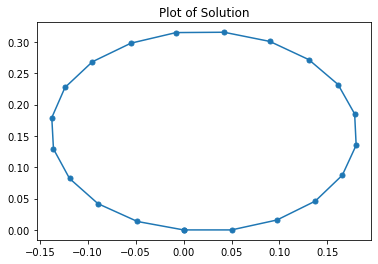

In [41]:
print(-g(x))
xvar = x[0:21]
yvar = x[21:42]
plt.plot(xvar, yvar, marker = ".", markersize = "10")
plt.title("Plot of Solution")

# Problem 20.1

In [1]:
import numpy as np
from PIL import Image
from scipy import optimize

In [2]:
Data = np.genfromtxt("A051.txt", dtype=float, encoding=None)
# Convert the pixels into an array using numpy
array = np.array(Data, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
new_image.save('new.png')

# inserting the image data as a submatrix of a larger matrix of zeroes
w = np.zeros([66,66])
w[1:65, 1:65] = Data

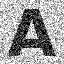

In [3]:
new_image

[255. 255.  98. ... 150. 203. 174.] 14360134.381656494 [ 64.  80. -80. ... -80. 112. -32.] 1
[250.24889854 242.60855794 146.12094054 ... 203.38420943 170.06460784
 206.89238867] 13024107.662361117 [  91.25   -28.375  -31.875 ...  101.375 -112.875  128.875] 2
[205.1528718  230.81071088 178.85988431 ... 194.38400047 175.77188858
 176.06235169] 12352553.735465895 [ -81.875   87.75    64.75  ...   28.25  -105.5     32.25 ] 3
[181.66653297 186.78263481 182.36362828 ... 174.92996884 196.8494715
 138.01332604] 11642982.37739123 [-105.25   -20.25    68.5   ...  -55.125  105.75   -68.   ] 4
[193.81549676 179.9299065  160.45159823 ... 165.92430411 189.88144274
 126.72726294] 11605182.970088394 [-25.875 -27.125 -17.625 ...  -0.125  98.875 -79.25 ] 5
[225.41565373 208.75115182 145.99341804 ... 150.18476742 170.98464265
 149.92644423] 11241697.328048632 [ 66.5    1.75 -32.   ... -79.75  16.   -56.  ] 6
[231.91160851 232.17955324 146.82451268 ... 167.61360665 160.22745377
 184.71181865] 11076330.510

[211.73612891 202.45020534 162.34835681 ... 181.7458021  179.81586884
 171.48376431] 6996855.705737695 [ 52.75    -4.5625 -15.625  ...  15.75   -39.125  -34.5   ] 52
[207.58227135 201.2915162  166.13570017 ... 183.0902823  182.09086501
 169.72206643] 6982005.998326566 [ 48.625  -69.6875 -11.875  ...  17.     -36.75   -36.25  ] 53
[201.92247659 204.17432947 170.06099676 ... 183.27473904 185.41120871
 170.13411006] 6981088.8170789145 [-22.5    -2.375  -8.    ... -46.25   30.375 -35.875] 54
[198.70946151 205.91862917 173.71367539 ... 186.56984054 184.73299188
 173.09270811] 6954448.319813625 [-88.25    62.8125  -4.3125 ...  84.5625 -34.1875 -32.8125] 55
[199.62701451 204.26757194 177.05423835 ... 185.01662917 184.41394465
 178.3589878 ] 6950869.814377516 [-23.4375  -2.6875  -0.875  ...  20.8125 -34.125   36.375 ] 56
[200.88990265 203.43720172 180.2656839  ... 183.65773058 183.41075877
 182.63928911] 6938323.51382592 [-22.0625  -3.5625  66.25   ...  15.3125 -33.5     40.9375] 57
[203.78111

[211.85653114 212.07732318 161.33136562 ... 187.46582182 192.94358196
 187.33719961] 6371817.552153346 [ -8.3125  66.1875 -16.6875 ... -42.4375 101.8125 -18.625 ] 102
[210.30310616 208.61920921 160.5202994  ... 187.81874714 190.14068037
 188.53475654] 6370035.013412949 [ 51.25     1.4375 -17.5    ...  21.75    35.5    -17.    ] 103
[207.77780721 205.69289386 160.3807658  ... 187.2360237  186.8198965
 189.90320244] 6358449.160449756 [ 48.625 -64.875 -17.625 ...  20.625 -95.    111.875] 104
[204.47053558 204.04501842 160.79908726 ... 186.29921203 185.4895277
 188.27224513] 6345384.630899431 [-19.375 -66.125 -17.25  ...  20.125 -94.5   109.5  ] 105
[201.94955338 203.34301624 161.85758837 ... 184.83917938 185.2601745
 184.49266032] 6339302.354859506 [-84.9375  -3.75   -16.1875 ... -44.25    29.3125 -21.1875] 106
[201.82440693 202.34173624 163.4016535  ... 184.50270062 183.65404832
 182.15334223] 6332983.817423312 [-84.5625  -5.1875 -14.5625 ...  18.375  -35.125  -23.75  ] 107
[203.60331207

[210.79042273 211.22434623 168.02201032 ... 187.45769199 187.71011231
 188.22750005] 6102708.463244899 [-11.4375  67.4375  -9.9375 ... -40.0625  29.6875 109.5625] 152
[210.28017885 210.31446618 166.76010491 ... 187.49591774 186.57976632
 187.22916591] 6099031.376734313 [  8.875  45.625 -11.25  ...  21.5   -95.875  53.375] 153
[209.56777846 209.21297293 165.75439821 ... 187.08358145 186.76304191
 185.95300873] 6093604.064192288 [ 49.375    3.3125 -12.25   ...  19.875  -31.     -19.75  ] 154
[208.17842774 208.24674399 164.95582798 ... 186.25459199 186.98221794
 185.09094175] 6089281.215532767 [ -1.      50.5    -13.125  ... -43.4375  32.25   -20.875 ] 155
[206.69666986 206.80975894 164.40347171 ... 185.84054474 186.85975046
 184.31098535] 6084499.686015376 [-71.9375  -7.9375 -13.5625 ... -43.9375  31.8125 -21.6875] 156
[205.84149407 205.79010385 164.18781169 ... 185.60917013 186.57218362
 183.66931214] 6080904.57851892 [-34.5   -47.75  -13.875 ... -44.25   31.5   -22.375] 157
[204.936704

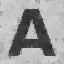

In [6]:
u = np.zeros(4096)

def f(x):
    # reshape vector x to insert as submatrix
    u = np.zeros([66,66])
    y = np.copy(x)
    y = np.reshape(y, (64,64), order = 'F')
    u[1:65, 1:65] = y
    N = np.shape(w)[0]
    M = np.shape(w)[1]
    t = 32
    epsilon = 0.1
    
    f = 0.
   
    f = 0.5*np.square(u[1:65, 1:65] - w[1:65, 1:65])
    up = 0.5*t*np.sqrt((epsilon**2) + np.square(u[1:65, 1:65] - u[0:64, 1:65]))
    bot = 0.5*t*np.sqrt((epsilon**2) + np.square(u[1:65, 1:65] - u[2:66, 1:65]))
    right = 0.5*t*np.sqrt((epsilon**2) + np.square(u[1:65, 1:65] - u[1:65, 2:66]))
    left = 0.5*t*np.sqrt((epsilon**2) + np.square(u[1:65, 1:65] - u[1:65, 0:64]))
    f = np.sum(f + up + bot + right + left)
    
    
    return f

x = BFGS(f, u, 200)[0]
            
x = np.reshape(x, (64,64), order = 'F')
array = np.array(x, dtype=np.uint8)
new_image = Image.fromarray(array)
new_image.save('denoised.png')
new_image

# Problem 21.1

In [31]:
import numpy as np

In [32]:
def f(vec):
    return (vec[0][0] - 1)**2 + (vec[1][0]-1)**2

def eqcon(vec):
    return (vec[1][0]**2) + (vec[0][0]**3)

def augf(vec, t):
    return f(vec) - (1./t)*np.log(-eqcon(vec))

def gradaugf(vec, t):
    x = vec[0][0]
    y = vec[1][0]
    grad = np.zeros([2,1])
    grad[0][0] = 2*x - 2 - (3*(x**2))/(t*(eqcon(vec)))
    grad[1][0] = 2*y - 2 - (2*(y))/(t*(eqcon(vec)))
    return grad

def hessaugf(vec, t):
    x = vec[0][0]
    y = vec[1][0]
    hess = np.zeros([2,2])
    hess[0][0] = 2 + (3*(x**4) - 6*(x)*(y**2))/(t*(eqcon(vec)**2))
    hess[0][1] = (6*(x**2)*(y))/(t*(eqcon(vec)**2))
    hess[1][0] = (6*(x**2)*(y))/(t*(eqcon(vec)**2))
    hess[1][1] = 2 + (2*(y**2) - 2*(x**3))/(t*(eqcon(vec)**2))
    return hess

In [33]:
# Solving the problem using Newton-Raphson method
var = [[-10.], [5.]]
t = 10.
fval = augf(var, t)
grad = gradaugf(var, t)
dt = 1.
n = 1
while(t < 1.e10):
    
    while (1>0):
        oldvar = np.copy(var)
        oldfval = np.copy(fval)
        hess = hessaugf(var, t)
        deltavar = -np.linalg.solve(hess, grad)
        if (np.dot(np.transpose(deltavar), grad) > 0):
            deltavar = -deltavar
    
        dt = 1.
        while (eqcon(oldvar + dt*deltavar) >= 0) or (augf(oldvar + dt*deltavar, t) >= oldfval):
            dt = 0.9*dt
            print(oldfval, fval)
    
        var = oldvar + dt*deltavar
        fval = augf(var,t)
        grad = gradaugf(var, t)
        print(var, f(var), augf(var,t), eqcon(var), np.linalg.norm(grad), n)
        if (n == 5000):
            print("This loop has ended after 10000 iterations.")
            break
        if (np.linalg.norm(grad) <= 1.e-4*np.sqrt(t)):
            break
        n = n+1
    t =t*10
        
print(var, f(var), eqcon(var), np.linalg.norm(grad), n)

136.3117562529002 136.3117562529002
136.3117562529002 136.3117562529002
136.3117562529002 136.3117562529002
[[-2.00500121]
 [ 2.08267917]] 10.202226460196512 10.070783898123885 -3.7226121797870615 6.125100632340772 1
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
10.070783898123885 10.070783898123885
[[-1.48459351]
 [ 1.75700988]] 6.746268845319006 6.915015863860794 -0.1849869151326593 3.6876063091063287 2
[[-0.47391143]
 [-0.08226204]] 3.343706030260446 3.57429539437222 -0.09966969190904755 3.2539427594890533 3
3.57429539437222 3.57429539437222
3

# Problem 21.3

In [ ]:
import numpy as np

In [38]:
varphi = (1.+ np.sqrt(5.))/2.
t = 1.

def g(x):
    return (x[0]-3)**2 + (x[1] - 2)**2 + (x[2] - 1)**2

def consttype1(u):
    x = u[0]
    y = u[1]
    z = u[2]
    return x - varphi*y - varphi**2, y - varphi*z - varphi**2, z - varphi*x - varphi**2

def consttype2(u):
    x = u[0]
    y = u[1]
    z = u[2]
    return x + varphi*y - varphi**2, y + varphi*z - varphi**2, z + varphi*x - varphi**2

def consttype3(u):
    x = u[0]
    y = u[1]
    z = u[2]
    return -x - varphi*y - varphi**2, -y - varphi*z - varphi**2, -z - varphi*x - varphi**2

def consttype4(u):
    x = u[0]
    y = u[1]
    z = u[2]
    return -x + varphi*y - varphi**2, -y + varphi*z - varphi**2, -z + varphi*x - varphi**2

def f(u):
    return g(u) - (1/t)*(np.log(-np.sum(consttype1(u))) + np.log(-np.sum(consttype2(u))) + np.log(-np.sum(consttype3(u))) + np.log(-np.sum(consttype4(u))))
    

In [39]:
t = 1.0
u = np.zeros(3)
grad = centraldiff(f, u)
while (t < 1.e12):
    while (1 > 0):
        oldu = u
        if (np.linalg.norm(grad) * np.sqrt(t) < 1.e-12):
            break
        hess = centralsecdiff(f, u)
        d = -np.linalg.solve(hess, grad)
        
        # not needed for this problem since it is convex, but still good practice to write anyways
        if (np.dot(d, grad) > 0):
            d = -d
        
        while (consttype1(u + d)[0] > 0) or (consttype1(u+d)[1] > 0) or (consttype1(u+d)[2] > 0) or (consttype2(u+d)[0] > 0) or (consttype2(u+d)[1] > 0) or (consttype2(u+d)[2] > 0) or (consttype3(u+d)[0] > 0) or (consttype3(u+d)[1] > 0) or (consttype3(u+d)[2] > 0) or (consttype4(u+d)[0] > 0) or (consttype4(u+d)[1] > 0) or (consttype4(u+d)[2] > 0) or (f(u + d) >= f(u)):
            d = 0.9*d
            if (np.linalg.norm(d) < 1.e-16):
                break
                
        u = u + d
        grad = centraldiff(f, u)
        print(u, t, np.linalg.norm(grad))
        
        # If difference between steps becomes insignificant, break loop
        if (np.linalg.norm(oldu - u) < 1.e-16):
            break
    
    t = t*10

[1.31758995 0.78619254 0.25476322] 1.0 2.2155691546305527
[1.33740983 0.78992206 0.24240307] 1.0 2.1388242828297317
[1.33928494 0.790267   0.24121797] 1.0 2.131586044111385
[1.33933689 0.79027654 0.2411851 ] 1.0 2.131385573430049
[1.33933887 0.7902769  0.24118385] 1.0 2.131377925827344
[1.33933905 0.79027694 0.24118374] 1.0 2.1313772480268924
[1.33933905 0.79027694 0.24118374] 1.0 2.1313772432612574
[1.33933905 0.79027694 0.24118374] 1.0 2.131377243134238
[1.33933905 0.79027694 0.24118374] 1.0 2.1313772431003173
[1.33933905 0.79027694 0.24118374] 1.0 2.131377243097424
[1.33933905 0.79027694 0.24118374] 1.0 2.13137724300433
[1.33933905 0.79027694 0.24118374] 1.0 2.1313772430072233
[1.33933905 0.79027694 0.24118374] 10.0 4.143514090260709
[1.33933905 0.79027694 0.24118374] 100.0 4.356675200388687
[1.33933905 0.79027694 0.24118374] 1000.0 4.378047845597709
[1.33933905 0.79027694 0.24118374] 10000.0 4.3801856447919825
[1.33933905 0.79027694 0.24118374] 100000.0 4.380399430127244
[1.3393390

In [40]:
print(u)
print(consttype1(u))
print(consttype2(u))
print(consttype3(u))
print(consttype4(u))
print(g(u))
print(np.sqrt(f(u)))

[1.33933905 0.79027694 0.24118374]
(-2.5573898835592015, -2.218000534604864, -4.543946353989135)
(0.0, -1.4375135723702033, -0.209754153073479)
(-5.23606797749979, -3.7985544051295865, -5.02631382442631)
(-2.6786780939405883, -3.018067442894926, -0.6921216235106546)
4.7970268179725695
2.1902115920534575


# Problem 21.4

In [23]:
import numpy as np
from scipy import optimize

In [24]:
# x = (x1,y1,x2,y2)
t1 = 1.
t2 = 1.
def f(x):
    y2 = x[3]
    y1 = x[1]
    return 3*y2 - 2*y1

def eqconst(x):
    x1 = x[0]
    y1 = x[1]
    x2 = x[2]
    y2 = x[3]
    return (x2 - x1)**2 + (y2 - y1)**2 - 2.

def ineqconst1(x,y):
    return y - x

def ineqconst2(x,y):
    return x**2 + y**2 - 4*y

def Lp(x):
    x1 = x[0]
    y1 = x[1]
    x2 = x[2]
    y2 = x[3]
    return f(x) + t1*eqconst(x)**2 - (1/t2)*( np.log(-ineqconst1(x1, y1)) + np.log(-ineqconst1(x2, y2)) + np.log(-ineqconst2(x1,y1)) + np.log(-ineqconst2(x2,y2)))



In [29]:
x = np.zeros(4)
x[0] = 1.
x[1] = 0.9
x[2] = 1.
x[3] = 0.4
t1 = 10000.
t2 = 1.
eps = np.finfo(float).eps
grad = optimize.approx_fprime(x, Lp, np.sqrt(eps)*np.ones(4))
while (t2 <= 1.e6):
    while (1 > 0):
        oldx = np.copy(x)
        x1 = oldx[0]
        y1 = oldx[1]
        x2 = oldx[2]
        y2 = oldx[3]
        hess = centralsecdiff(Lp, x)
        if (np.isnan(hess).any()):
            break
        d = -np.linalg.solve(hess, grad)
        if (np.dot(d, grad) > 0):
            d = -d
        
        while (ineqconst1(x1 + d[0], y1 + d[1]) > 0) or (ineqconst1(x2 + d[2], y2 + d[3]) > 0) or (ineqconst2(x1 + d[0], y1 + d[1]) > 0) or (ineqconst2(x2 + d[2], y2 + d[3]) > 0) or (Lp(x + d) > Lp(x)):
            d = 0.5*d
            
        x = x + d
        grad = optimize.approx_fprime(x, Lp, np.sqrt(eps)*np.ones(4))
        if (np.isnan(grad).any()):
            break
        print(x, t1, t2)
        if (np.linalg.norm(grad)*np.sqrt(t2) < 1.e-4) or (np.linalg.norm(oldx - x) < 1.e-15):
            break
    
    t1 = t1*10
    t2 = t2*10
    
print(x)
print(eqconst(x),ineqconst1(x[0], x[1]),ineqconst1(x[2], x[3]),ineqconst2(x[0], x[1]),ineqconst2(x[2], x[3]))



[1.1325116  1.08302516 1.1325507  0.40795279] 10000.0 1.0
[1.28568816 1.26067418 1.28587311 0.48228352] 10000.0 1.0
[1.33132439 1.32107556 1.33193466 0.51621357] 10000.0 1.0
[1.36164537 1.356013   1.36307491 0.5410742 ] 10000.0 1.0
[1.38118501 1.37827704 1.3842321  0.55893018] 10000.0 1.0
[1.30161509 1.28732672 1.27924044 0.46667191] 10000.0 1.0
[1.34267452 1.34228874 1.3210397  0.5003384 ] 10000.0 1.0
[1.95075319 1.94718659 1.49784226 0.74738657] 10000.0 1.0
[1.92316495 1.91798992 1.44405583 0.64512574] 10000.0 1.0
[1.90183614 1.89608158 1.42305821 0.60782245] 10000.0 1.0
[1.90471883 1.88533366 1.34434198 0.58193888] 10000.0 1.0
[1.82850212 1.79407563 1.24832832 0.50414009] 10000.0 1.0
[1.73956913 1.67562749 1.0901585  0.41704548] 10000.0 1.0
[1.71193561 1.62052868 1.03466523 0.37862913] 10000.0 1.0
[1.68211235 1.54695805 0.93322138 0.34453282] 10000.0 1.0
[1.68844623 1.53689481 0.92706886 0.34502349] 10000.0 1.0
[1.67276741 1.4926639  0.86678249 0.32934295] 10000.0 1.0
[1.66935721 1.

<ipython-input-24-7dcfc5c2ed36>:27: RuntimeWarning: invalid value encountered in log
  return f(x) + t1*eqconst(x)**2 - (1/t2)*( np.log(-ineqconst1(x1, y1)) + np.log(-ineqconst1(x2, y2)) + np.log(-ineqconst2(x1,y1)) + np.log(-ineqconst2(x2,y2)))


In [30]:
print(x)
print(f(x))

[1.32550002 1.32549695 0.62143622 0.09900022]
-2.3539932254774802
